In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

%matplotlib inline

path = '../data/covers/'

In [2]:
df = pd.read_csv(path+'base.csv',sep=';',decimal=',')
df.replace(to_replace=r'properties', value='jpg', regex=True,inplace=True)
df.head()

name                   b1  \
0  0001BFD8A4B8735B5BEE52282B392820.jpg   0.4647965145718742   
1  000252148AEA0C1F52DF52067D47A924.jpg   0.9728764931169802   
2  00030CA61304CA486165F1FFE701DAF9.jpg   0.7369396703187162   
3  000502B337F3EECF034B4B202EC0250B.jpg  0.47285325451653126   
4  000527A374338971ADB8C68E3DD8FBAD.jpg   0.8094858788606986   

                    b2                   h1                   h2  \
0  0.32173970803660196   0.4071637552766217   0.3724891993682404   
1  0.12490816829303285                  0.0                  0.0   
2  0.17361123405382337   0.4680602352237899  0.17366607466548994   
3  0.32608111665242767  0.49178812803159494  0.22035922135828936   
4   0.3300581238396209  0.19563310138422288  0.34554802361750253   

                    s1                   s2  
0   0.4266859967637939   0.2972669844608622  
1                  0.0                  0.0  
2   0.8686488625720191   0.2167704038402477  
3   0.3455637393719832  0.21684421103410653  
4  0.10586959330609105  0.24323208638722008

In [3]:
df.describe()

name     b1     b2     h1     h2  \
count                                  96744  96744  96744  96744  96744   
unique                                 96744  89696  89691  73476  73472   
top     61ED9869C55B1DB66BEE0BEF9E507626.jpg    1.0    0.0    0.0    0.0   
freq                                       1   1997   2012  17782  17788   

           s1     s2  
count   96744  96744  
unique  73516  73512  
top       0.0    0.0  
freq    17782  17787

In [4]:
X = df.iloc[:, 1:].values
X.shape

(96744, 6)

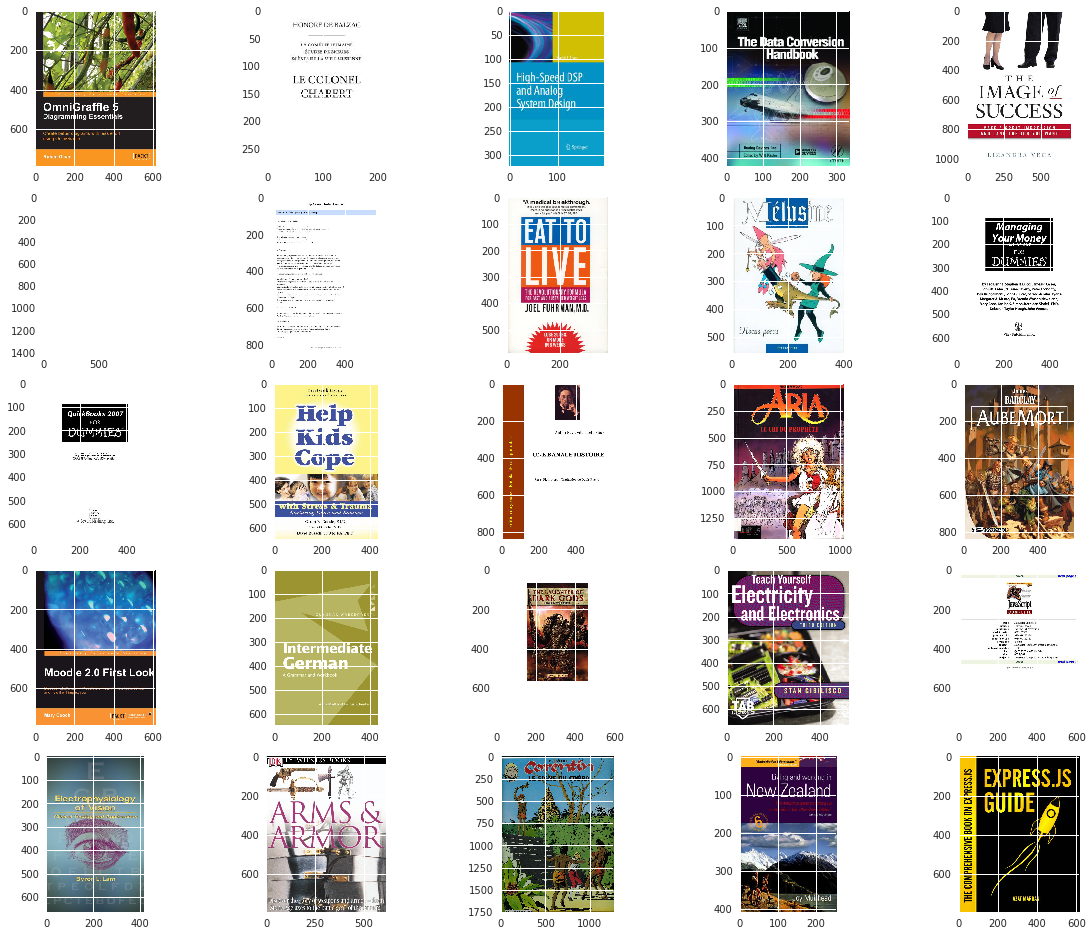

In [5]:
images = []
for row in df.name[:25]:
    images.append(mpimg.imread(path+'/COVER_JPEG/'+row))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [6]:
# UMéthode elbow pour trouver le nombre optimal de clusters
wcss = []
mini = 1
maxi = 20
for i in range(mini, maxi):
    start_time = time.time()
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_jobs = -1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('n cluster: {} - elapsed time {}'.format(i, time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))))

n cluster: 1 - elapsed time 00:00:00
n cluster: 2 - elapsed time 00:00:00
n cluster: 3 - elapsed time 00:00:01
n cluster: 4 - elapsed time 00:00:01
n cluster: 5 - elapsed time 00:00:01
n cluster: 6 - elapsed time 00:00:02
n cluster: 7 - elapsed time 00:00:03
n cluster: 8 - elapsed time 00:00:04
n cluster: 9 - elapsed time 00:00:03
n cluster: 10 - elapsed time 00:00:03
n cluster: 11 - elapsed time 00:00:06
n cluster: 12 - elapsed time 00:00:05
n cluster: 13 - elapsed time 00:00:05
n cluster: 14 - elapsed time 00:00:06
n cluster: 15 - elapsed time 00:00:08
n cluster: 16 - elapsed time 00:00:07
n cluster: 17 - elapsed time 00:00:14
n cluster: 18 - elapsed time 00:00:18
n cluster: 19 - elapsed time 00:00:19


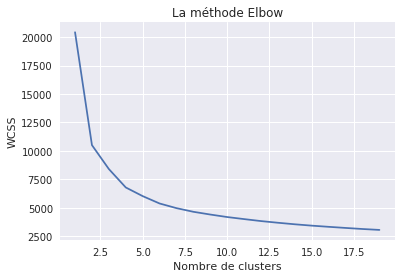

In [7]:
plt.plot(range(mini, maxi), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Construction du modèle
k = 20
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0, n_jobs = -1)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[ 1  2  7 ... 18 18 12]


In [9]:
df['cat'] = y_kmeans

In [10]:
df.head()

name                   b1  \
0  0001BFD8A4B8735B5BEE52282B392820.jpg   0.4647965145718742   
1  000252148AEA0C1F52DF52067D47A924.jpg   0.9728764931169802   
2  00030CA61304CA486165F1FFE701DAF9.jpg   0.7369396703187162   
3  000502B337F3EECF034B4B202EC0250B.jpg  0.47285325451653126   
4  000527A374338971ADB8C68E3DD8FBAD.jpg   0.8094858788606986   

                    b2                   h1                   h2  \
0  0.32173970803660196   0.4071637552766217   0.3724891993682404   
1  0.12490816829303285                  0.0                  0.0   
2  0.17361123405382337   0.4680602352237899  0.17366607466548994   
3  0.32608111665242767  0.49178812803159494  0.22035922135828936   
4   0.3300581238396209  0.19563310138422288  0.34554802361750253   

                    s1                   s2  cat  
0   0.4266859967637939   0.2972669844608622    1  
1                  0.0                  0.0    2  
2   0.8686488625720191   0.2167704038402477    7  
3   0.3455637393719832  0.21684421103410653   11  
4  0.10586959330609105  0.24323208638722008    8

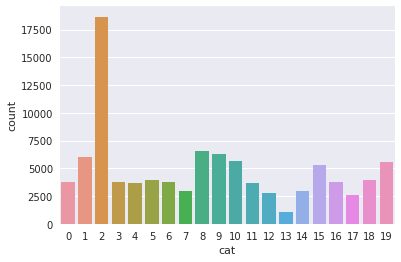

In [11]:
sns.countplot(x='cat',data=df)

In [12]:
def images_subset_plot(cat):
    images = []
    subset = df[df.cat==cat].sample(20)
    for index, row in enumerate(subset.name):
        images.append(mpimg.imread(path+'/COVER_JPEG/'+row))

    plt.figure(figsize=(20,10))
    plt.suptitle('========cat {} ========'.format(cat), fontsize=16)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

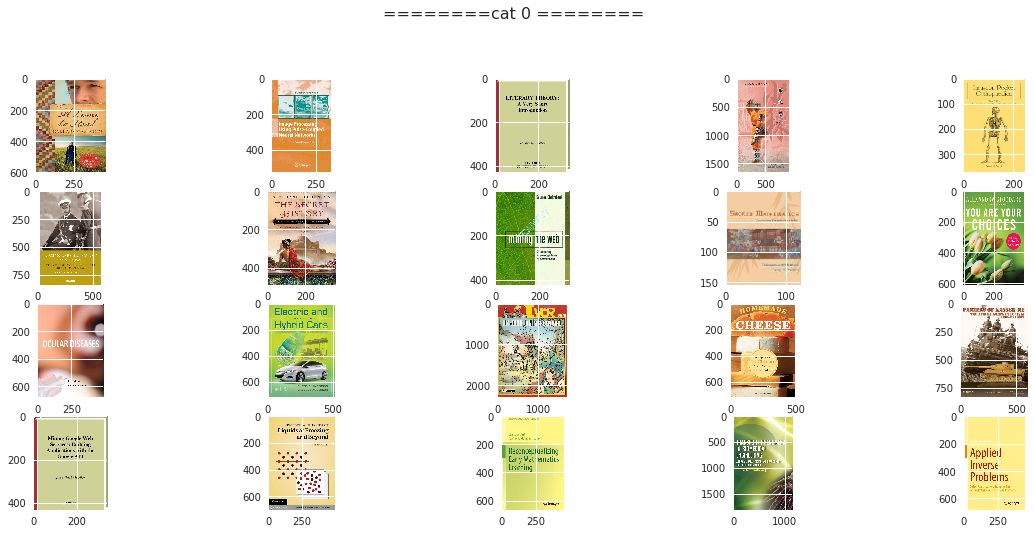

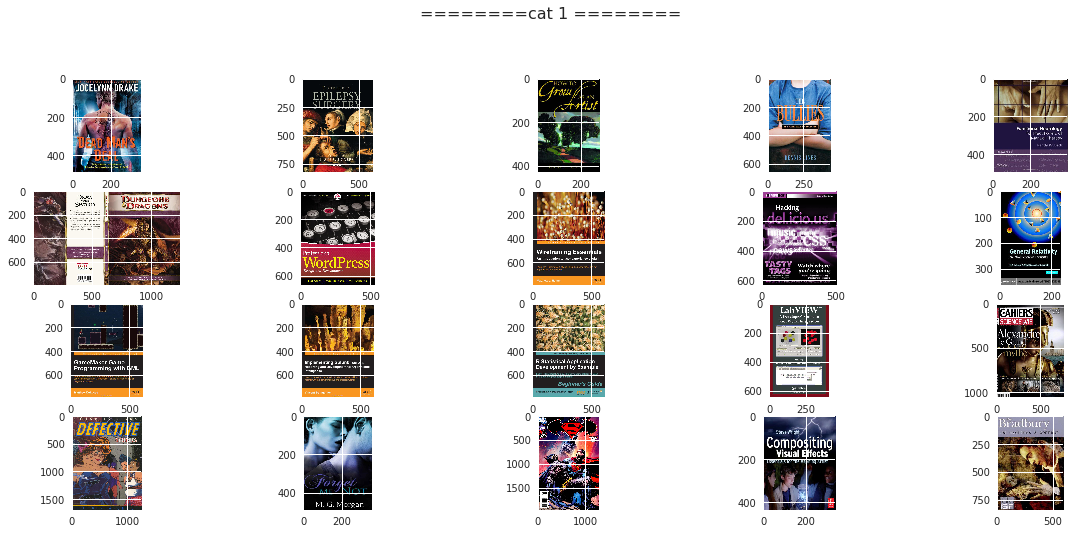

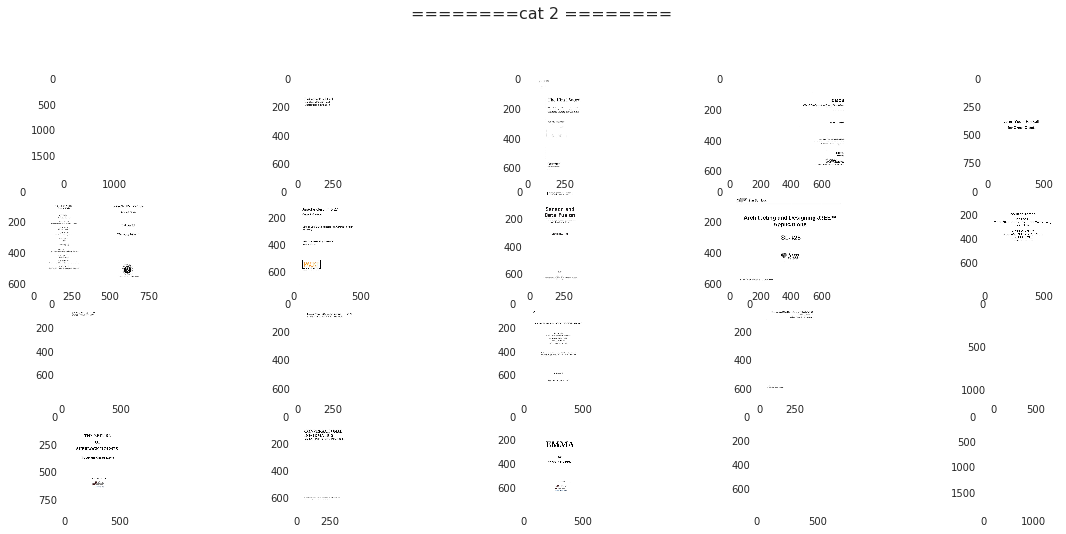

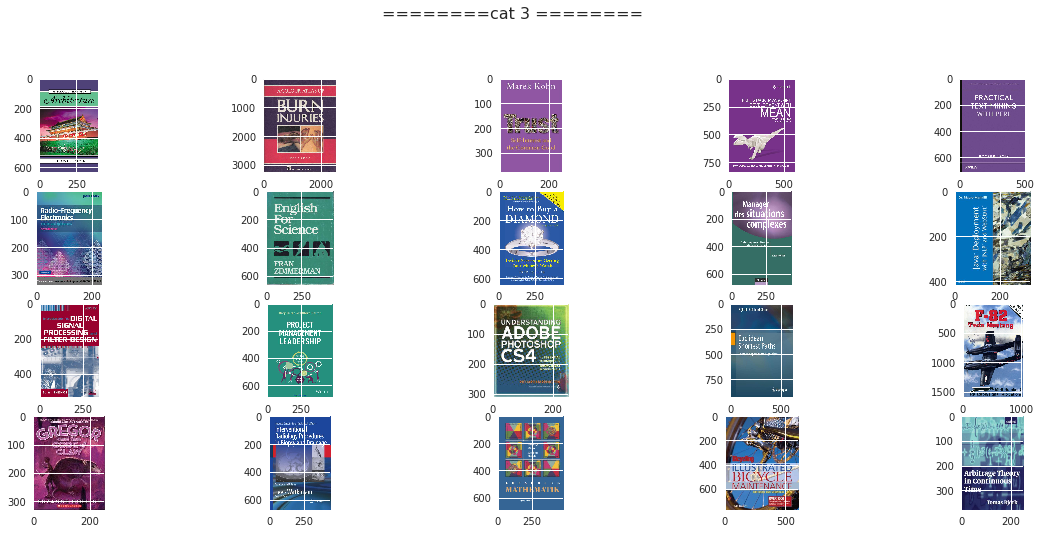

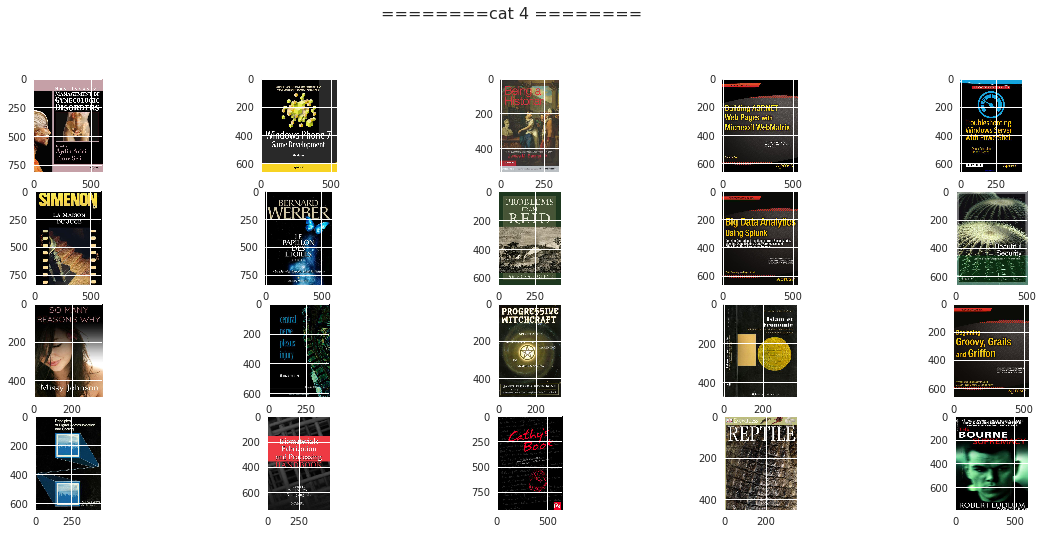

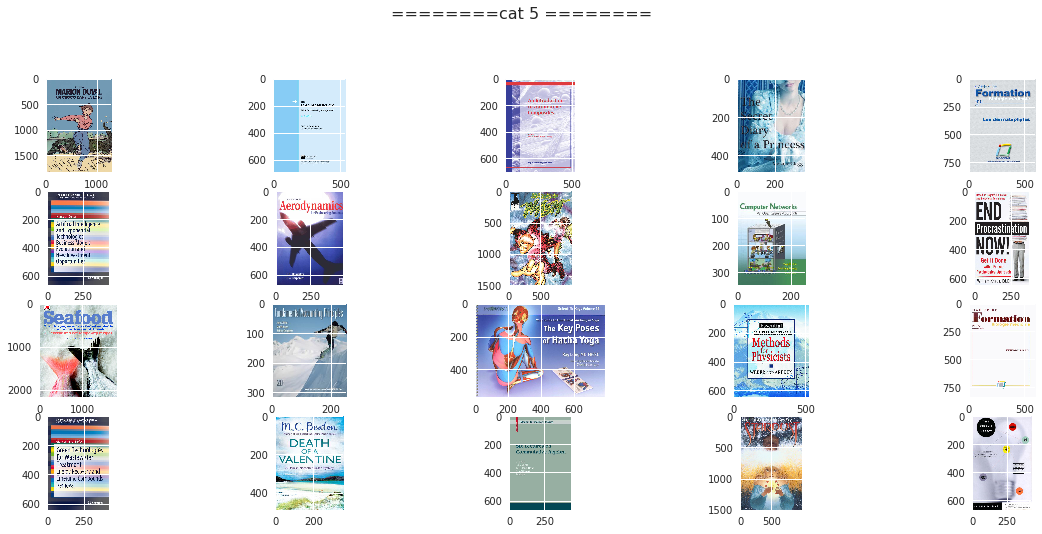

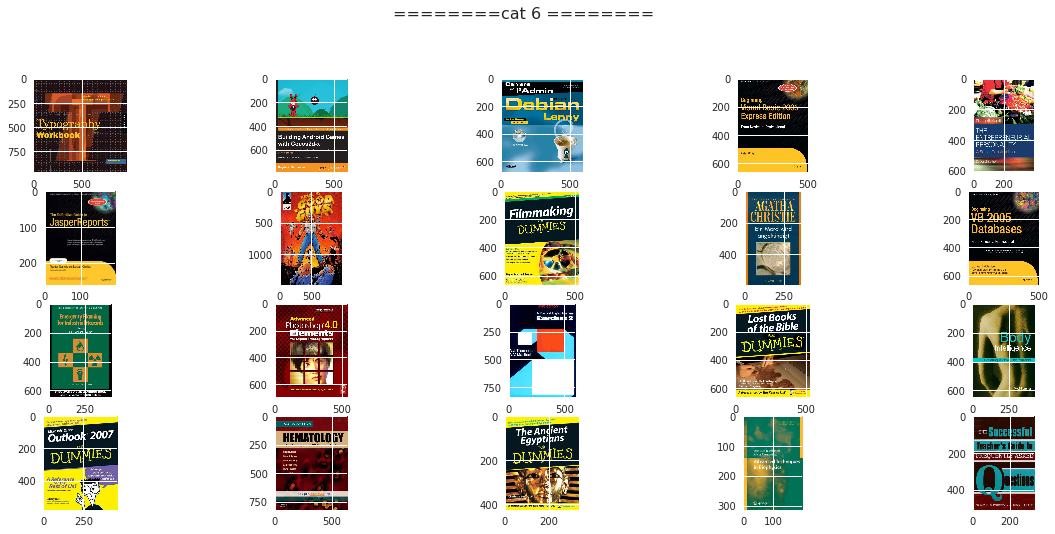

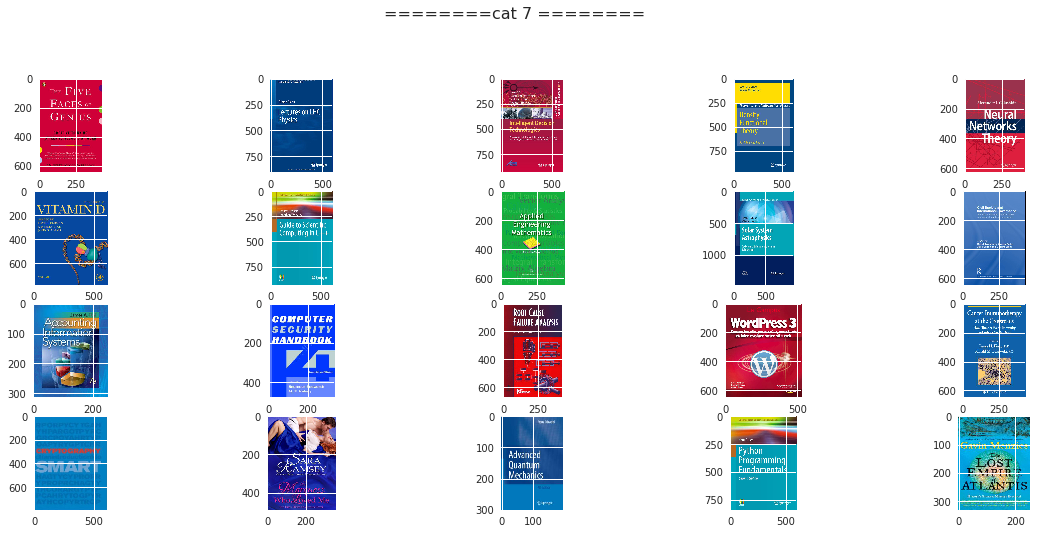

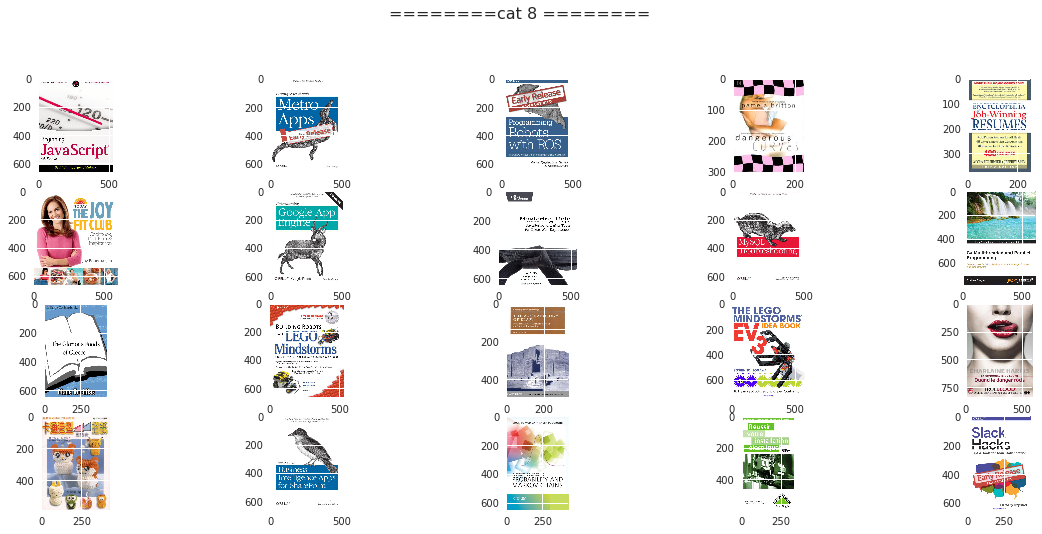

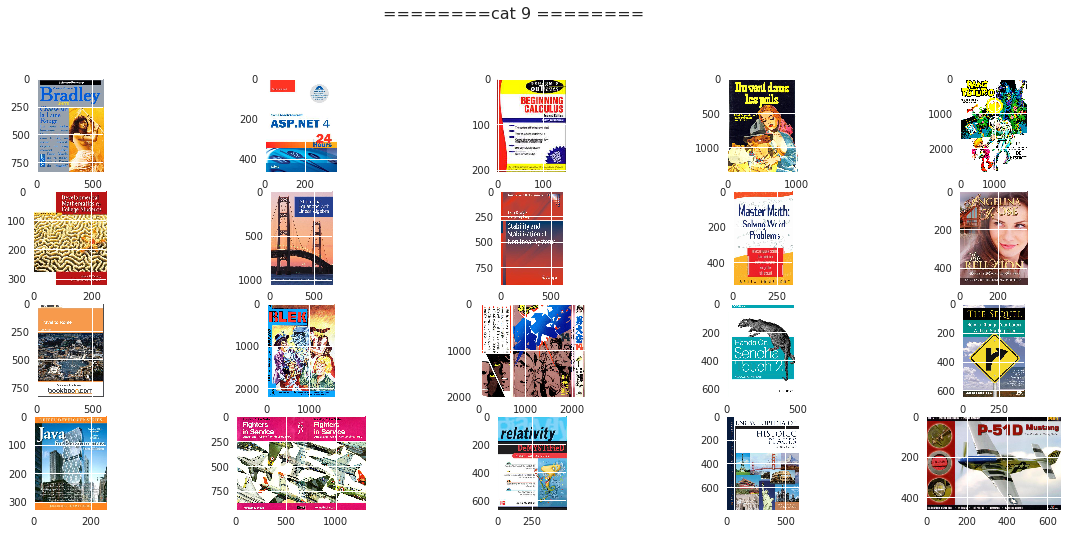

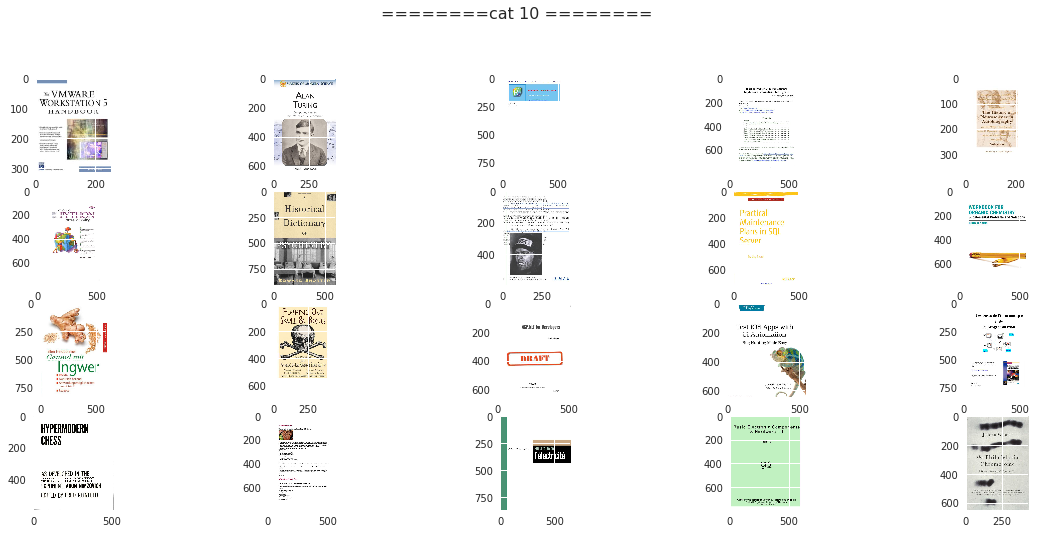

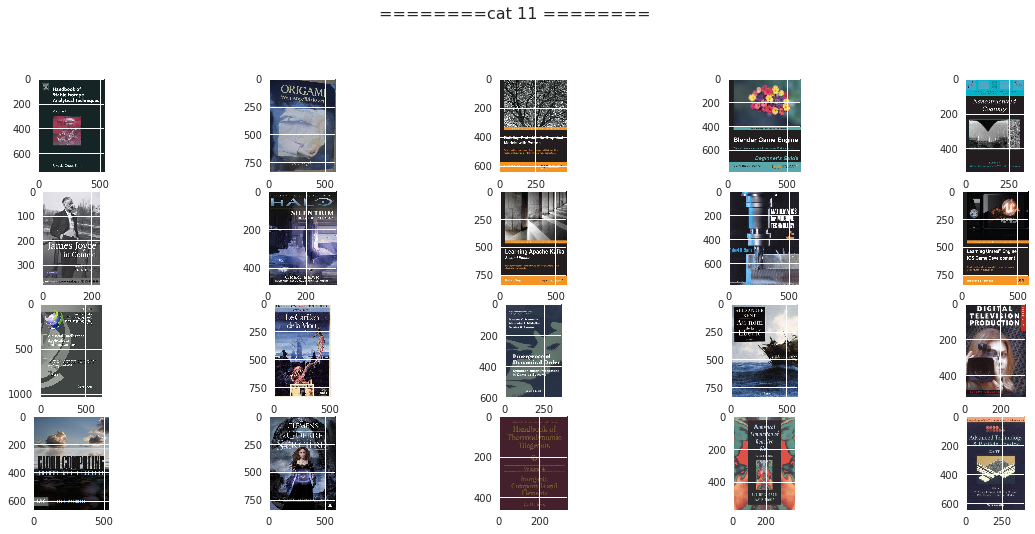

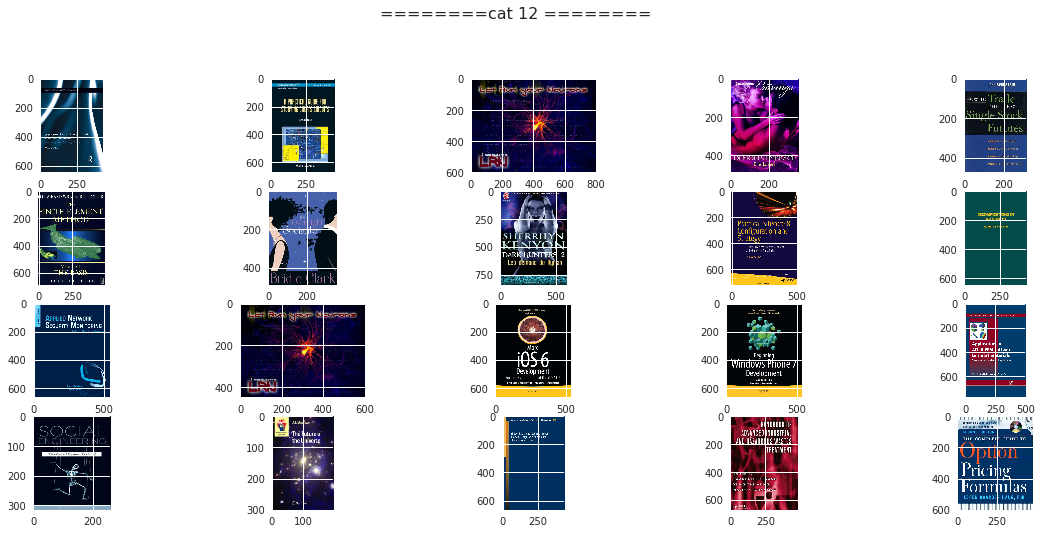

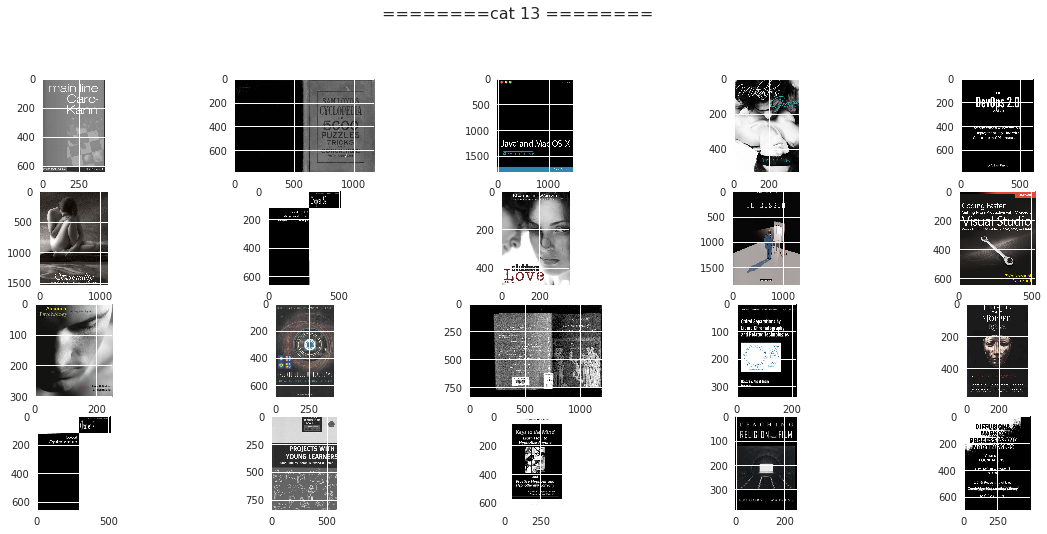

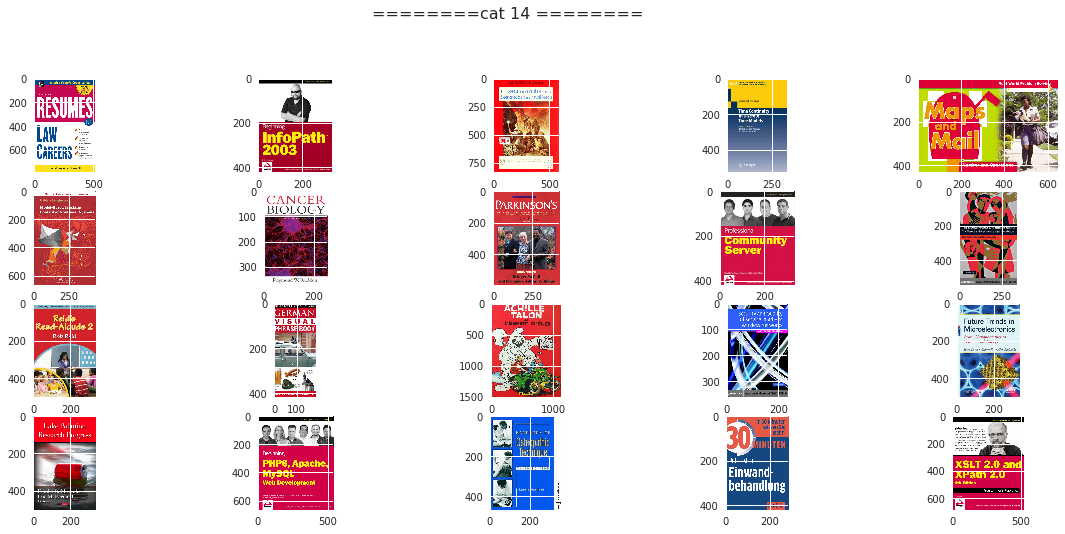

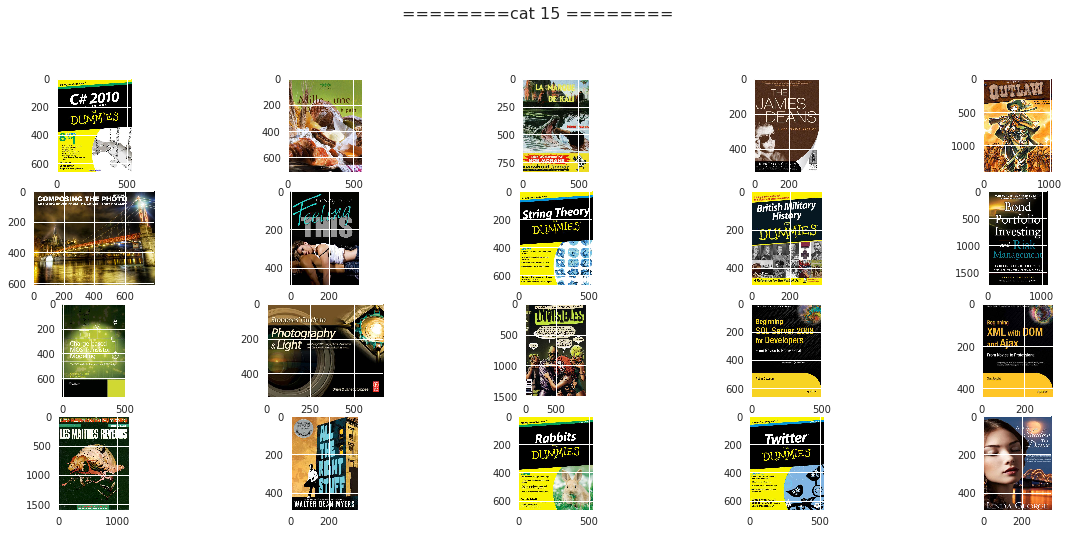

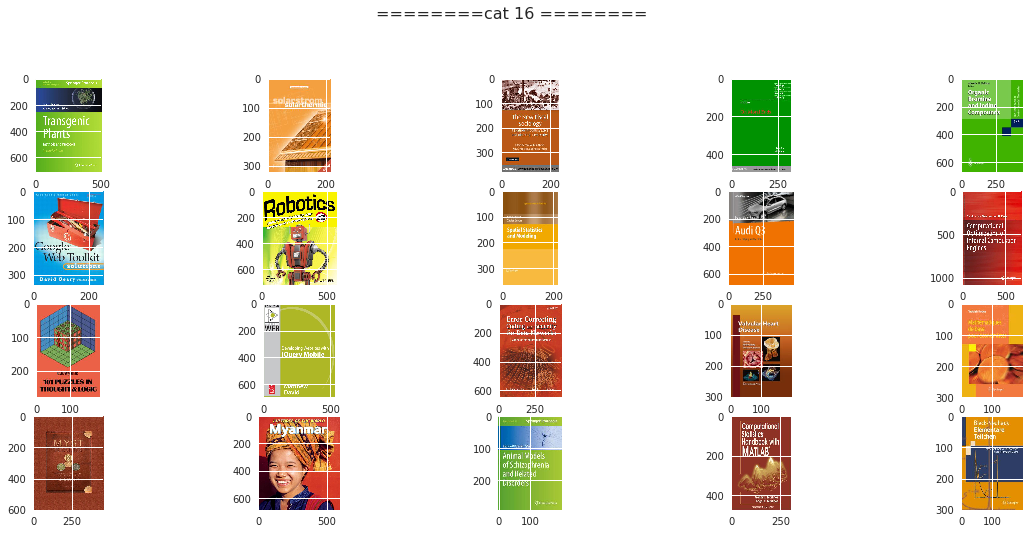

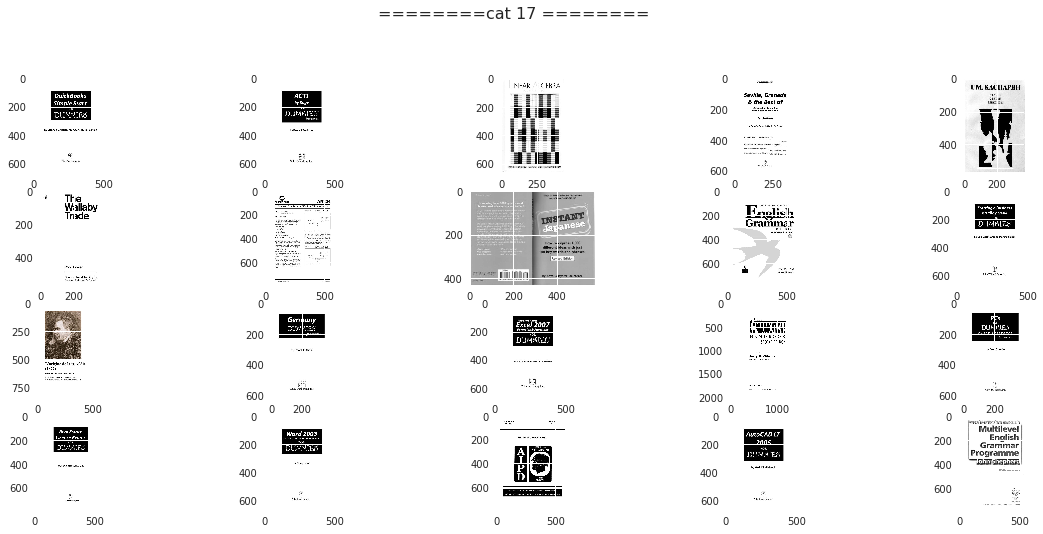

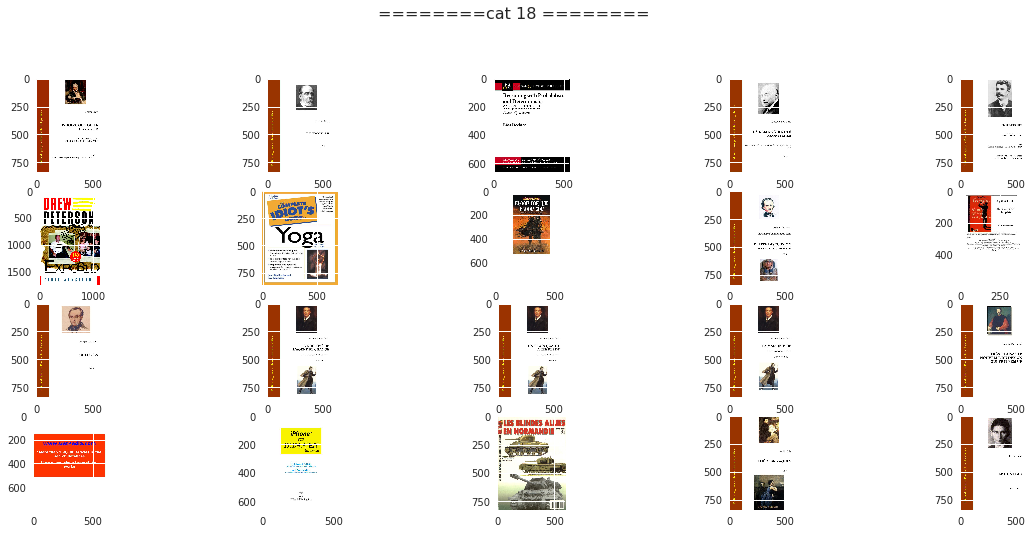

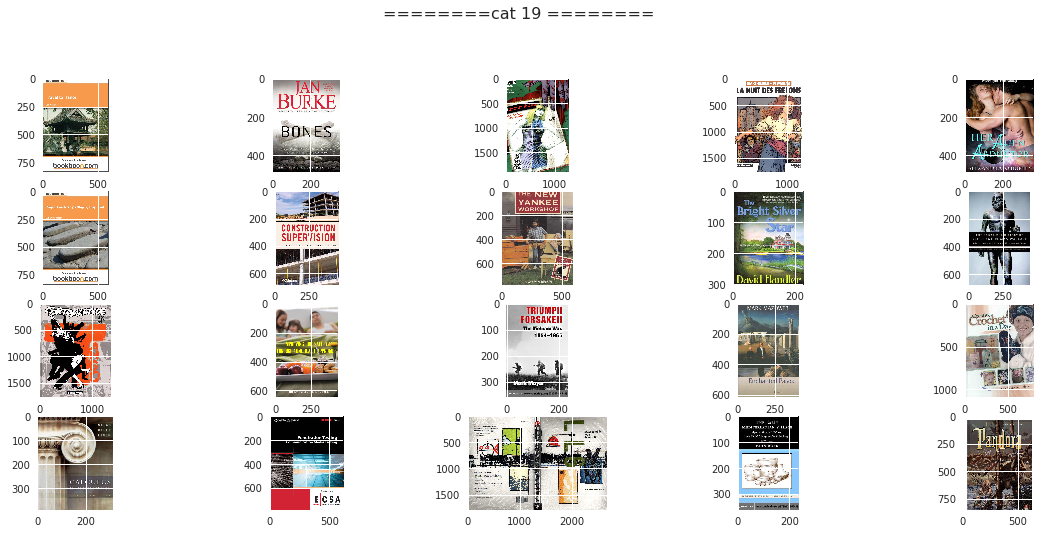

In [13]:
for i in range(0,k):
    images_subset_plot(i)